A structure made of masses and springs and we will minimize the potential energy to determien the deflection

In [10]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(linewidth=150)
np.set_printoptions(precision=3)


plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 16

Define constant in SI

In [43]:
g = 9.81
m= 0.1
n = 20
e = 0.1
l=e
k = 1000

define the initial positions of the masses

In [44]:
P0 = np.zeros((n,2))
P0[:,0] = np.repeat(e*np.arange(n//2),2)
P0[:,1] = np.tile((0,-e), n//2)
P0

array([[ 0. ,  0. ],
       [ 0. , -0.1],
       [ 0.1,  0. ],
       [ 0.1, -0.1],
       [ 0.2,  0. ],
       [ 0.2, -0.1],
       [ 0.3,  0. ],
       [ 0.3, -0.1],
       [ 0.4,  0. ],
       [ 0.4, -0.1],
       [ 0.5,  0. ],
       [ 0.5, -0.1],
       [ 0.6,  0. ],
       [ 0.6, -0.1],
       [ 0.7,  0. ],
       [ 0.7, -0.1],
       [ 0.8,  0. ],
       [ 0.8, -0.1],
       [ 0.9,  0. ],
       [ 0.9, -0.1]])

Define the connectivity matrix between the masses. coefficient (i,j) is 1 if the masses i and j are connect by a spring, 0 otherwise

In [45]:
A = np.eye(n,n,1) + np.eye(n,n,2)
A

array([[ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  

Specifiy spring stiffness ofeach spring, where it is l for springs strait up/down or sideways (orthogonal) or l$\sqrt{2}$

In [46]:
L = l*(np.eye(n,n,1) + np.eye(n,n,2))
for i in range(n//2-1):
    L[2*i+1, 2*i+2] *= np.sqrt(2)

Get the non-zero indices of the spring connections

In [47]:
I,J = np.nonzero(A)

the dist function computes the distance matrix

In [48]:
dist = lambda P: np.sqrt( (P[:,0]-P[:,0][:,np.newaxis])**2 + (P[:,1]-P[:,1][:,np.newaxis])**2 )

plotting function that shows the springs based on their tension

In [49]:
def show_bar(P):
    #Wall
    plt.axvline(0,color='k', lw=3)
    # Distance Matrix
    D = dist(P)
    #plot the springs
    for i, j in zip(I,J):
        c = D[i,j] - L[i,j]
        plt.plot(P[[i,j],0], P[[i,j],1], lw=2, color=plt.cm.copper(c*150))
    
    #plot the masses
    plt.plot(P[[I,J],0], P[[I,J],1], 'ok',)
    
    #configure axis
    plt.axis('equal')
    plt.xlim(P[:,0].min()-e/2, P[:,0].max()+e/2)
    plt.ylim(P[:,1].min()-e/2, P[:,1].max()+e/2)
    plt.xticks([]) ; plt.yticks([])
    

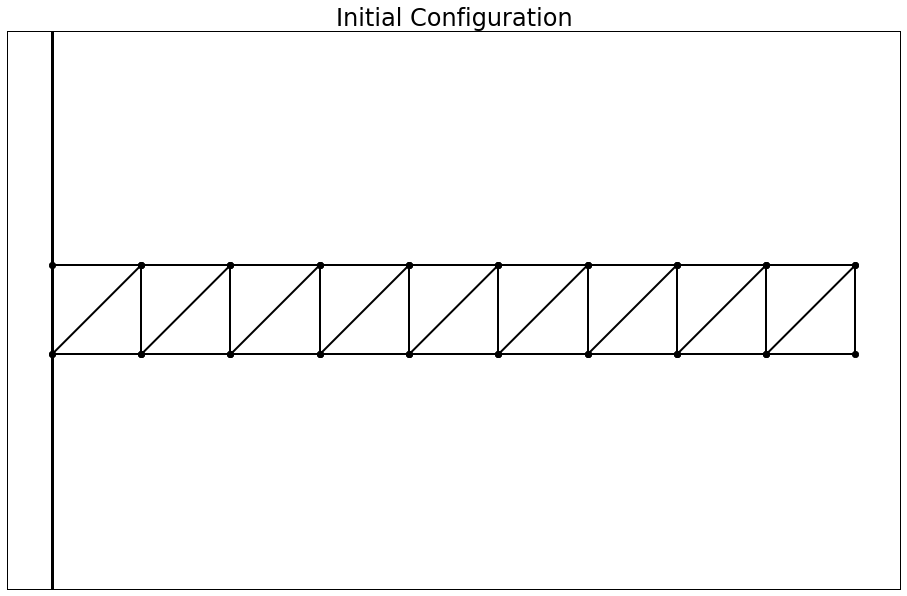

In [50]:
show_bar(P0)
plt.title('Initial Configuration')
plt.show()

To determine the equilibrium state, we need to minimize the potential energy of the system. This function computes the ebergy of the system given the positions  of the masses

In [51]:
def energy(P):
    # flatten the position matrix
    P = P.reshape((-1,2))
    # compute the distance matrix
    D = dist(P)
    #the potential energy is the sum of the gravitationla and elastic potential energies
    PE = (g*m*P[:,1].sum() + 0.5 * (k *A *(D-L)**2).sum())
    return PE    

Computute the potential energy at the initial configureation

In [52]:
energy(P0.ravel())

-0.98100000000000009

In [53]:
bounds = np.c_[P0[:2,:].ravel(), P0[:2,:].ravel()].tolist() + [[None, None]] * (2*(n-2))

In [54]:
P1 = opt.minimize(energy, P0.ravel(), method='L-BFGS-B', bounds=bounds).x.reshape((-1, 2))

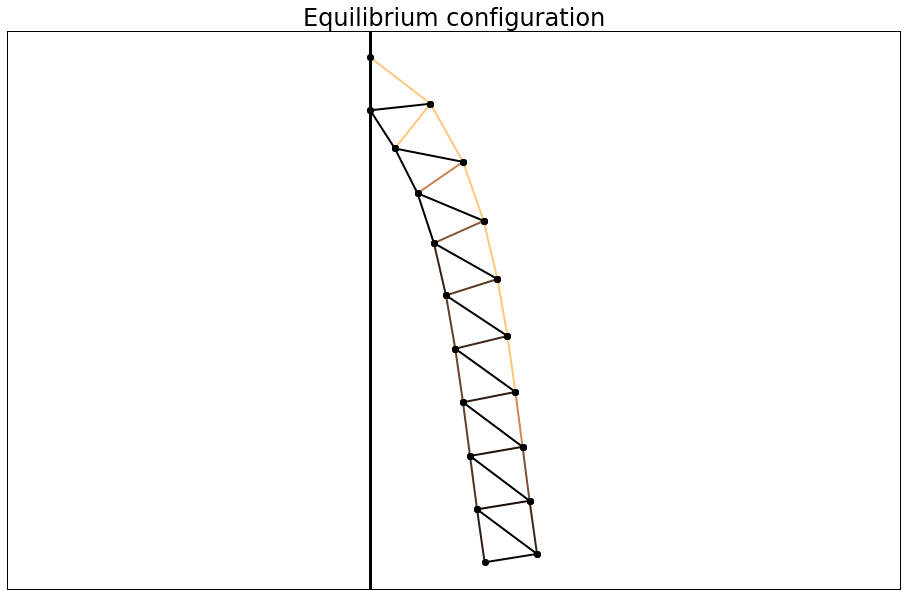

In [55]:
show_bar(P1)
plt.title("Equilibrium configuration")